In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Synthetic Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
kind = "BAH"                    # network generative model type
N = 2000                        # number of nodes
m = 4                           # minimun degree (proxy of density)
H = 0.6                         # homophily
B = 0.5                         # class balance (minority fraction)
sampling = "nodes"              # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.2                    # fraction of nodes to sample 
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network(kind)
net.create_network(N=N,m=m,B=B,H=H)
net.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 2000
Number of edges: 7984
Average degree:   7.9840
{'attributes': ['color'], 'class': 'color', 'group': ['M', 'm'], 'labels': ['blue', 'red'], 'name': 'homophilic_barabasi_albert', 'kind': 'BAH', 'fullname': 'BAH-N2000-m4-B0.5-H0.6-i1-x1-h0.6-k8.0-km8.1-kM7.8'}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds)
sam.extract_subgraph()
sam.info()

Name: homophilic_barabasi_albert
Type: Graph
Number of nodes: 400
Number of edges: 399
Average degree:   1.9950
{'attributes': ['color'], 'class': 'color', 'group': ['M', 'm'], 'labels': ['blue', 'red'], 'name': 'homophilic_barabasi_albert', 'kind': 'BAH', 'fullname': 'BAH-N2000-m4-B0.5-H0.6-i1-x1-h0.6-k8.0-km8.1-kM7.8', 'pseeds': 0.2, 'method': 'nodes'}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

red     0.5375
blue    0.4625
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          blue       red
blue  0.526462  0.473538
red   0.383747  0.616253


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(1, 1, 0, 1, 1)
(1, 0, 1, 0, 0)
(0.061302095415253416, 0.581970279719041, 0.003190771323551759, 0.6820660508679158, 0.9283103348837498)

Prediction in 1074.2503814697266 seconds
ROCAUC: 0.5839318510413818
ROCAUC curve: 0.5839318510413818
MAE: 0.51
ccm: 0.44713375796178345
ccM: 0.5312883435582823
bias: 0.4569947441570682

../results-individual creating...
../results-individual created!
BAH-N2000-m4-B0.5-H0.6-i1-x1-h0.6-k8.0-km8.1-kM7.8 creating...
BAH-N2000-m4-B0.5-H0.6-i1-x1-h0.6-k8.0-km8.1-kM7.8 created!
BAH-N2000-m4-B0.5-H0.6-i1-x1-h0.6-k8.0-km8.1-kM7.8/P20_graph.gpickle saved!
BAH-N2000-m4-B0.5-H0.6-i1-x1-h0.6-k8.0-km8.1-kM7.8/P20_evaluation.pickle saved!


<h2>5. Results</h2>

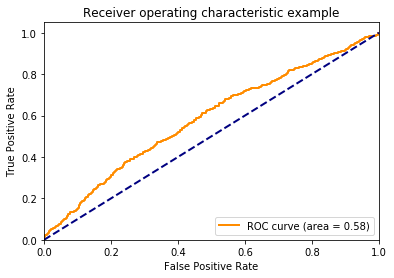

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)